In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn import metrics

In [3]:
iris = datasets.load_iris()



In [4]:
data=pd.DataFrame({
    'sepal_length':iris.data[:,0],
    'sepal_width':iris.data[:,1],
    'petal_length':iris.data[:,2],
    'petal_width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
X=data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] 
y=data['species'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [7]:
from sklearn import metrics
print("Accuracy :",metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.9555555555555556


In [8]:
clf

RandomForestClassifier()

In [9]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.443842
petal length (cm)    0.436506
sepal length (cm)    0.094164
sepal width (cm)     0.025488
dtype: float64

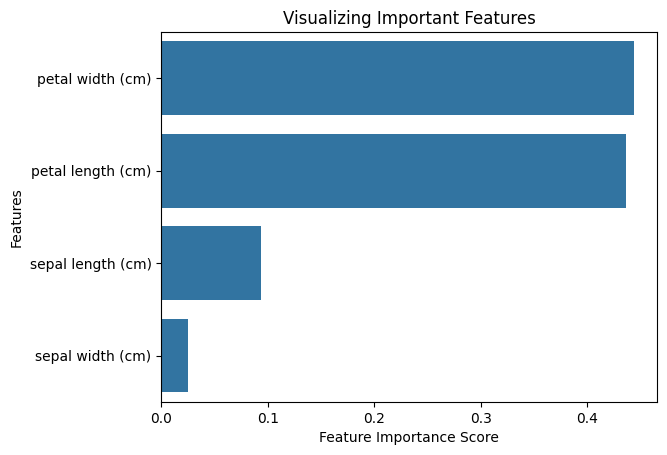

In [12]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

In [13]:
X=data[['petal_length', 'petal_width']] 
y=data['species']                                       
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5)

In [14]:
clf_sf=RandomForestClassifier(n_estimators=100)
clf_sf.fit(X_train,y_train)
y_pred=clf_sf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9523809523809523
